<a href="https://colab.research.google.com/github/simoneminorr/eda_assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

In [1]:
! git clone https://github.com/ds3001f25/eda_assignment.git

Cloning into 'eda_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 7 (from 1)
Receiving objects: 100% (9/9), 799.41 KiB | 9.99 MiB/s, done.


**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

1. Show that  𝑚(𝑎+𝑏𝑋)=𝑎+𝑏×𝑚(𝑋)

In [ ]:
2. Show that  cov(𝑋,𝑎+𝑏𝑌)=𝑏×cov(𝑋,𝑌)

3. Show that  cov(𝑎+𝑏𝑋,𝑎+𝑏𝑋)=𝑏2cov(𝑋,𝑋) , and in particular that  cov(𝑋,𝑋)=𝑠2 .

4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if  𝑥≥𝑥′ , then  𝑔(𝑥)≥𝑔(𝑥′) ), like  2+5×𝑋  or  arcsinh(𝑋) . Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?

5. Consider a non-decreasing transformation  𝑔() . Is is always true that  𝑚(𝑔(𝑋))=𝑔(𝑚(𝑋)) ?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [2]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd eda_assignment/

/content/eda_assignment


1. Load the ./data/airbnb_hw.csv data with Pandas. This provides a dataset of AirBnB rental properties for New York City.

In [8]:
airbnb= read_csv('data/airbnb_hw.csv')

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

In [12]:
airbnb.head()
print(airbnb.head())
airbnb.shape
airbnb.count()
#.shape returns rows, columns
#There are 30478 rows and 13 columns
#There are 30478 observations
#Variables: Host Id, Since, Name Neighbourhood, Property Type, Review Scores Rating (bin), Room Type, Zipcode, Beds, Number of Records, Number od Reviews, Price, and Review Scores Rating

    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews Price  Review Scores R

,0
Host Id,30478
Host Since,30475
Name,30478
Neighbourhood,30478
Property Type,30475
Review Scores Rating (bin),22155
Room Type,30478
Zipcode,30344
Beds,30393
Number of Records,30478


3. Cross tabulate Room Type and Property Type. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [13]:
pd.crosstab(airbnb['Room Type'], airbnb['Property Type'])
#Most rental properties are apartments, then houses, then lofts and it seems these are where people more often than not are able to rent the entire property or a private room
#Most apartment property types have an entire property/apt. or second most a private room and lastly, a shared room as the room type
#Private rooms are more common than renting the entire property for bed and breakfasts, houses, and dorms

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


4. For Price, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use log to transform price into a new variable, price_log, and take these steps again.

NameError: name 'x' is not defined

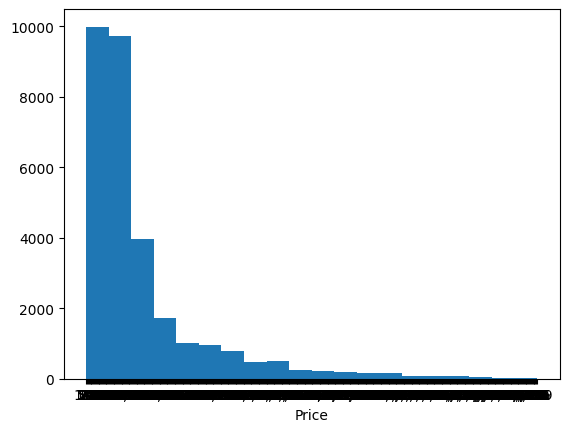

In [20]:
#histogram
airbnb['Price'].hist(bins=20, grid=False)
plt.xlabel('Price')
x.tick_params(labelsize=10)
plt.ylabel('Frequency')
plt.show()

5. Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

6. Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see? Compute a description of Price conditional on Room Type and Property Type. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [4]:
drilling = read_csv('data/drilling_rigs.csv')

In [5]:
drilling.head()
print(drilling.head())
drilling.shape
drilling.count()
#.shape returns rows, columns
#There are 30478 rows and 13 columns
#There are 30478 observations
#Variables: Host Id, Since, Name Neighbourhood, Property Type, Review Scores Rating (bin), Room Type, Zipcode, Beds, Number of Records, Number od Reviews, Price, and Review Scores Rating

           Month  \
0   1973 January   
1  1973 February   
2     1973 March   
3     1973 April   
4       1973 May   

   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)  \
0                                               1120                              
1                                               1037                              
2                                                959                              
3                                                914                              
4                                                974                              

   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)  \
0                                                 99                               
1                                                 89                               
2                                                 90                               
3                                           

,0
Month,623
"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)",623
"Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)",623
"Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)",623
"Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",623
"Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)",623
"Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)",623
"Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)",623
"Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",623
Active Well Service Rig Count (Number of Rigs),623
